# Временные ряды

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import scipy.stats as st

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.holtwinters import ExponentialSmoothing


## Warmup

In [2]:
data = pd.read_csv('data/time.txt', parse_dates=[0], dayfirst=True)

In [3]:
data.sample(5)

,Time
225,2019-04-01
79,2019-03-03
214,2019-03-31
106,2019-03-10
197,2019-03-25


In [4]:
groups = data['Time'].groupby(data['Time']).count()

In [5]:
data = groups.cumsum()

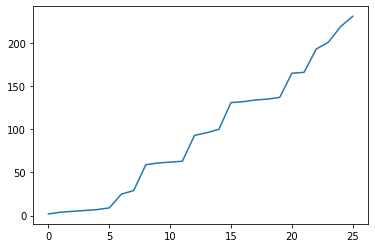

In [6]:
_ = plt.plot(data.values)
plt.show()

<Figure size 1152x2304 with 0 Axes>

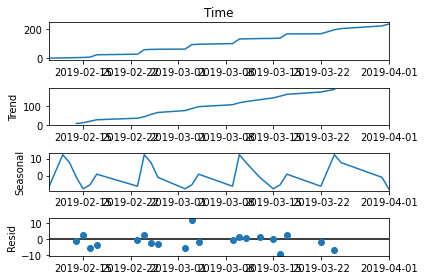

In [11]:
plt.figure(figsize=(16, 32))
stl_data = seasonal_decompose(data, period=7)
_ = stl_data.plot()
_ = plt.show()

### ARIMA

In [12]:
# Ошибки стационарны

kpss(data, nlags='legacy')

(0.40940321263519297,
 0.07310206351931338,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [13]:
new_data = {}
time_iter = pd.date_range('20190210','20190401',freq='D')
old_data = None
for i in time_iter:
    if i in data:
        new_data[i] = float(data[i])
        old_data = new_data[i] 
    else:
        new_data[i] = old_data

new_data = pd.DataFrame({'Time':new_data})

**Заполнили промежутки между измерениями, чтобы они стали одинаковыми — 1 день**

In [15]:
new_data

,Time
2019-02-10,2.0
2019-02-11,2.0
2019-02-12,4.0
2019-02-13,5.0
2019-02-14,6.0
2019-02-15,7.0
2019-02-16,9.0
2019-02-17,25.0
2019-02-18,25.0
2019-02-19,25.0


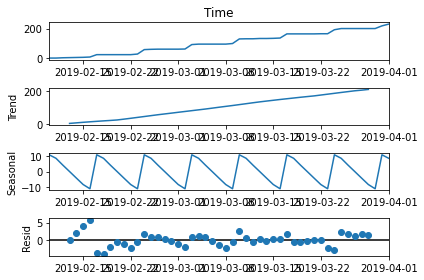

In [14]:
stl_data = seasonal_decompose(new_data['Time'], period=7)
stl_data.plot()

plt.show()

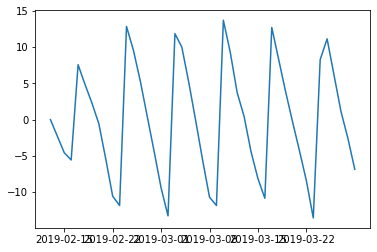

In [16]:
new_data_without_trend = new_data.copy()[3:-3]
new_data_without_trend['Time'] = (new_data['Time'] - stl_data.trend)[3:-3]
plt.plot(new_data_without_trend)

plt.show()

In [17]:
kpss(new_data['Time'], nlags='legacy')

(0.5457819993868097,
 0.03135540554351132,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [18]:
kpss(new_data_without_trend['Time'], nlags='legacy')

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.08857810513345854,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

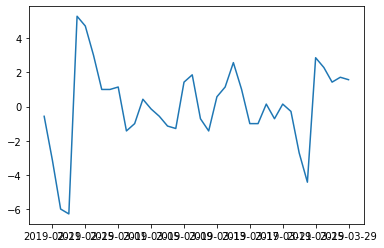

In [19]:
plt.plot(new_data_without_trend.diff(7))

plt.show()

In [20]:
kpss(new_data_without_trend['Time'].diff(7)[7:], nlags='legacy')

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.22509539267611928,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

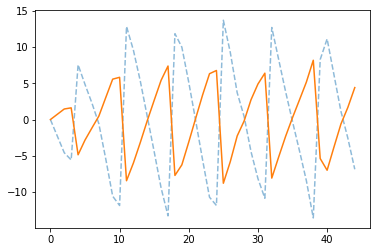

In [21]:
arima = ARIMA(new_data_without_trend['Time'].values, order=(1,1,1)).fit()

plt.plot(new_data_without_trend['Time'].values, alpha=0.5, ls='--')
plt.plot(arima.predict(1, len(new_data_without_trend), dynamic=False))

plt.show()

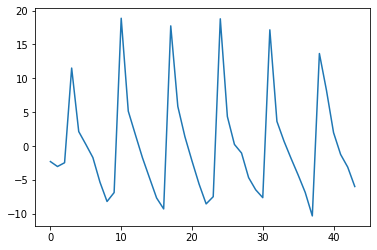

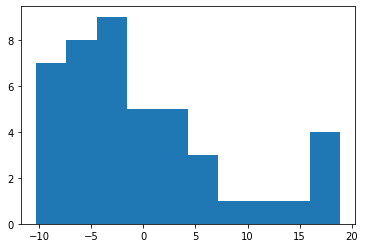

ShapiroResult(statistic=0.8828225135803223, pvalue=0.00033624967909418046)

In [22]:
_ =plt.plot(arima.resid)
plt.show()
_ = plt.hist(arima.resid)
plt.show()
st.shapiro(arima.resid)

In [23]:
arima = SARIMAX(new_data_without_trend['Time'].values, order=(1,0,1), seasonal_order=(0,2,1,7)).fit()

arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   45
Model:             SARIMAX(1, 0, 1)x(0, 2, 1, 7)   Log Likelihood                 -72.834
Date:                           Tue, 06 Apr 2021   AIC                            153.667
Time:                                   18:44:23   BIC                            159.403
Sample:                                        0   HQIC                           155.537
                                            - 45                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1342      0.325      0.414      0.679      -0.502       0.770
ma.L1          0.4605      0.383      1.202      0.229      -0.290       1.211
ma.S.L7       -0.3109      0.316     -0.984      0.325      -0.930       0.309
sigma2         6.2094      1.755      3.538      0.000       2.770       9.649
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.86   Prob(JB):                         0.33
Heteroskedasticity (H):               0.53   Skew:                            -0.28
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

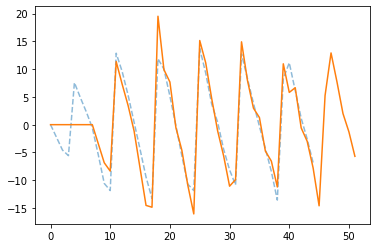

In [24]:
plt.plot(new_data_without_trend['Time'].values, alpha=0.5, ls='--')
plt.plot(arima.predict(0, len(new_data['Time'].values)))

plt.show()

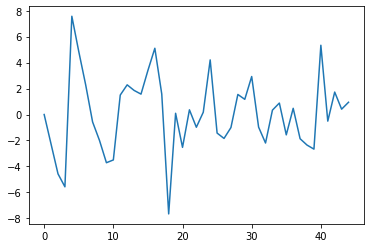

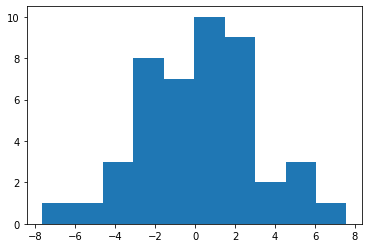

ShapiroResult(statistic=0.9895412921905518, pvalue=0.953395664691925)

In [25]:
_ =plt.plot(arima.resid)
plt.show()
_ = plt.hist(arima.resid)
plt.show()
st.shapiro(arima.resid)


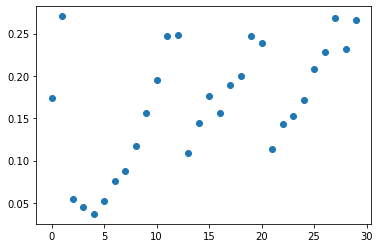

In [27]:
plt.scatter(range(30), acorr_ljungbox(arima.resid, lags=30)[1])

plt.show()

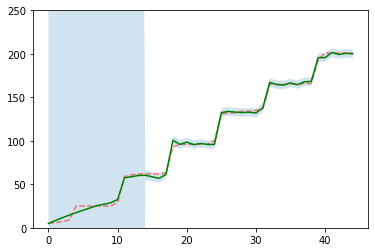

In [28]:
predictition = arima.get_prediction(0, len(new_data_without_trend)-1).conf_int()
intervals = stl_data.trend.values.flatten()[3:-3] + predictition[:, 0], stl_data.trend.values.flatten()[3:-3] + predictition[:, 1]

plt.fill_between(range(len(intervals[0])), intervals[0], intervals[1], alpha=0.2)
plt.ylim(0, 250)
plt.plot(new_data['Time'].values[3:-3], alpha=0.5, ls='--', c='r')
plt.plot(stl_data.trend.values.flatten()[3:-3]+arima.predict(0, len(new_data_without_trend)-1), c='g')

plt.show()

### ETS

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


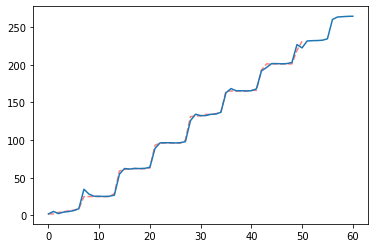

In [29]:
ets = ExponentialSmoothing(new_data['Time'].values, trend='add', seasonal='add', seasonal_periods=7).fit()
plt.plot(new_data['Time'].values, alpha=0.5, ls='--', c='r')
predicted = ets.predict(0, 60)

plt.plot(predicted)

plt.show()

## Продажи австралийского вина

Известны ежемесячные продажи австралийского вина в тысячах литров с января 1980 по июль 1995, необходимо построить прогноз на следующие два года.

In [30]:
data = pd.read_csv('data/monthly-australian-wine-sales-th.csv', parse_dates=[0], delimiter=',')
data.sample(5)

,Month,Monthly Australian wine sales: thousands of litres. By wine makers in bottles <= 1 litre.
137,1991-06-01,23816
92,1987-09-01,26804
128,1990-09-01,25421
81,1986-10-01,26157
114,1989-07-01,29009


In [31]:
data.columns = ['date', 'wine']
data.head()

,date,wine
0,1980-01-01,15136
1,1980-02-01,16733
2,1980-03-01,20016
3,1980-04-01,17708
4,1980-05-01,18019


/home/hp/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


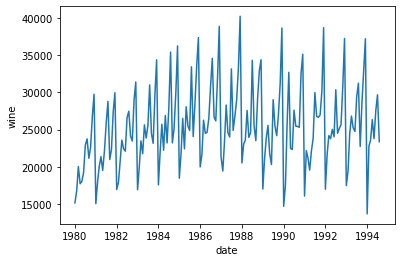

In [32]:
sns.lineplot(data['date'],data['wine'])

plt.show()

Попробуем поделить на число дней в месяце:

/home/hp/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


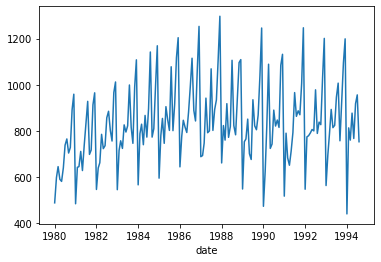

In [33]:
values = data['wine'].values.copy()
days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
for i in range(len(values)):
    values[i]/=days[i%12]
sns.lineplot(data['date'],values)

plt.show()

Ряд не стал более регулярным, так что вернёмся к исходным данным.

STL-декомпозиция ряда:

In [34]:
data = data.set_index(pd.DatetimeIndex(data['date']))

In [35]:
data.head()

,date,wine
date,,
1980-01-01,1980-01-01,15136
1980-02-01,1980-02-01,16733
1980-03-01,1980-03-01,20016
1980-04-01,1980-04-01,17708
1980-05-01,1980-05-01,18019


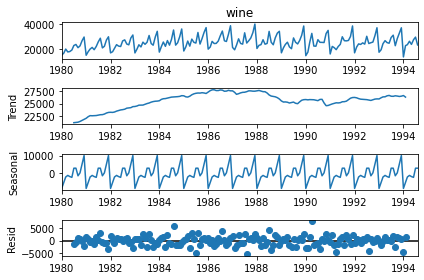

In [36]:
stl_data = seasonal_decompose(data['wine'])
stl_data.plot()

0.23667537162383442


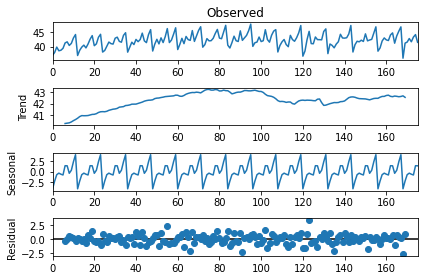

In [37]:
transformed, lam = st.boxcox(data['wine'])
data['bc'] = transformed
print (lam)
stl_data = seasonal_decompose(transformed, period=12)
stl_data.plot()

### ARIMA

Стационарность:

In [38]:
kpss(data['wine'], nlags='legacy')

(0.5448466202836393,
 0.03156607651269385,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Cделаем сезонное дифференцирование:

(0.5200996002022095,
 0.03713972968418706,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

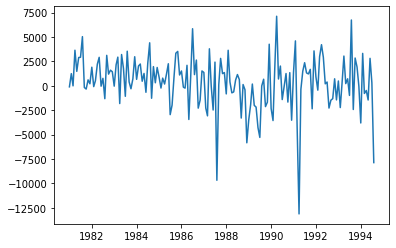

In [39]:
diff_ts = data['wine'].diff(12)[12:]
plt.plot(diff_ts)
kpss(diff_ts, nlags='legacy')

Ряд всё ещё нестационарен. Проведём ещё одно дифференцирование:

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.14664368174766995,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

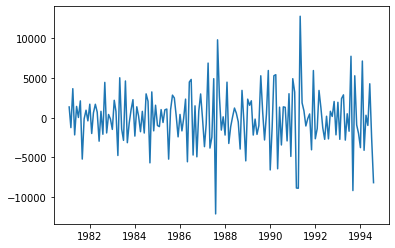

In [40]:
diff_diff_ts = diff_ts.diff(1)[1:]
plt.plot(diff_diff_ts)
kpss(diff_diff_ts, nlags='legacy')


Для полученного ряда гипотеза стационарности не отвергается

Посмотрим на ACF и PACF полученного продифференцированного ряда:

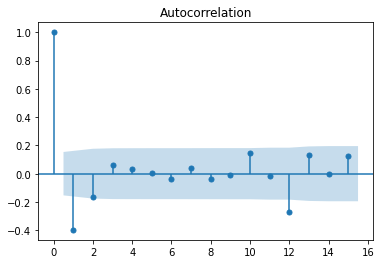

In [41]:
plot_acf(diff_diff_ts, lags=15)

plt.show()

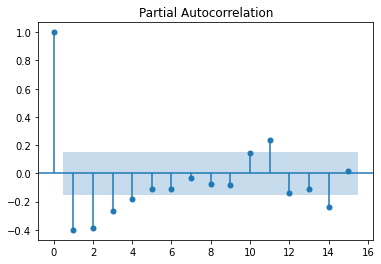

In [42]:
plot_pacf(diff_diff_ts, lags=15)

plt.show()

На ACF значимы лаги 1 и 12, на PACF — 1-3. Будем искать модель, оптимальную по AICc, в окрестности ARIMA(3,1,1)

In [43]:
for i in range(-1,2):
    for k in range(-1, 2):
        order = (3+i,1,1+k)
        try:
            arima = ARIMA(data['wine'].values, order=order).fit()
            print(arima.summary())
        except:
            pass

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1764.553
Method:                       css-mle   S.D. of innovations           5783.214
Date:                Tue, 06 Apr 2021   AIC                           3537.107
Time:                        19:07:00   BIC                           3549.766
Sample:                             1   HQIC                          3542.242
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4810    234.100      0.224      0.823    -406.347     511.309
ar.L1.D.y     -0.4336      0.068     -6.399      0.000      -0.566      -0.301
ar.L2.D.y     -0.4413      0.067     -6.550      0.0

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1739.339
Method:                       css-mle   S.D. of innovations           4980.097
Date:                Tue, 06 Apr 2021   AIC                           3488.678
Time:                        19:07:00   BIC                           3504.502
Sample:                             1   HQIC                          3495.097
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1327     24.556      1.268      0.205     -16.996      79.262
ar.L1.D.y      0.1196      0.075      1.596      0.110      -0.027       0.267
ar.L2.D.y     -0.2752      0.074     -3.700      0.0

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1739.338
Method:                       css-mle   S.D. of innovations           4980.097
Date:                Tue, 06 Apr 2021   AIC                           3490.677
Time:                        19:07:01   BIC                           3509.665
Sample:                             1   HQIC                          3498.379
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1093     24.554      1.267      0.205     -17.015      79.234
ar.L1.D.y      0.1130      0.202      0.560      0.576      -0.283       0.509
ar.L2.D.y     -0.2744      0.078     -3.535      0.0

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1739.338
Method:                       css-mle   S.D. of innovations           4980.097
Date:                Tue, 06 Apr 2021   AIC                           3490.676
Time:                        19:07:03   BIC                           3509.664
Sample:                             1   HQIC                          3498.378
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1076     24.554      1.267      0.205     -17.017      79.232
ar.L1.D.y      0.1210      0.080      1.515      0.130      -0.036       0.278
ar.L2.D.y     -0.2754      0.075     -3.696      0.0

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:684: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 2*np.arctanh(params)
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarn

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1749.878
Method:                       css-mle   S.D. of innovations           5310.240
Date:                Tue, 06 Apr 2021   AIC                           3511.757
Time:                        19:07:05   BIC                           3530.745
Sample:                             1   HQIC                          3519.459
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.4460    141.359      0.364      0.716    -225.613     328.505
ar.L1.D.y     -0.6435      0.075     -8.547      0.000      -0.791      -0.496
ar.L2.D.y     -0.6711      0.083     -8.114      0.0

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -1738.141
Method:                       css-mle   S.D. of innovations           4946.794
Date:                Tue, 06 Apr 2021   AIC                           3490.281
Time:                        19:07:06   BIC                           3512.435
Sample:                             1   HQIC                          3499.267
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5702     24.708      1.237      0.216     -17.856      78.997
ar.L1.D.y      0.1320      0.080      1.644      0.100      -0.025       0.289
ar.L2.D.y     -0.2352      0.079     -2.980      0.0

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [44]:
arima = ARIMA(data['wine'].values, order=(2,1,1)).fit()
print(arima.summary())

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1739.339
Method:                       css-mle   S.D. of innovations           4980.097
Date:                Tue, 06 Apr 2021   AIC                           3488.678
Time:                        19:07:12   BIC                           3504.502
Sample:                             1   HQIC                          3495.097
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1327     24.556      1.268      0.205     -16.996      79.262
ar.L1.D.y      0.1196      0.075      1.596      0.110      -0.027       0.267
ar.L2.D.y     -0.2752      0.074     -3.700      0.0

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


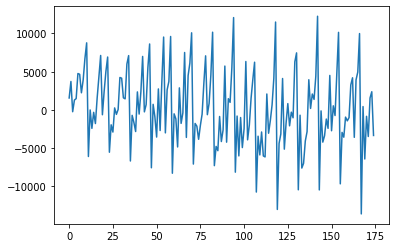

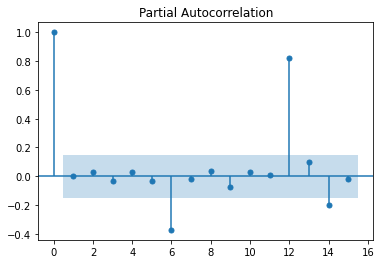

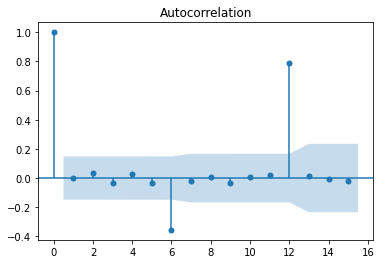

In [45]:
plt.plot(arima.resid)
plot_pacf(arima.resid, lags=15)
plot_acf(arima.resid, lags=15)

plt.show()

In [46]:
for i in range(-1,2):
    for j in range(-1, 2):
        order = (3+i, 1, 1+j)
        sorder = (1, 1, 1, 12)
        try:
            arima = SARIMAX(data['wine'].values, order=order, seasonal_order=sorder).fit()
            print(arima.summary())
        except:
            pass

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  176
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1532.390
Date:                              Tue, 06 Apr 2021   AIC                           3074.781
Time:                                      19:08:42   BIC                           3090.249
Sample:                                           0   HQIC                          3081.061
                                              - 176                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4661      0.041    -11.448      0.000      -0.546      -0.386
ar.L2         -0.29

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1527.899
Date:                            Tue, 06 Apr 2021   AIC                           3069.798
Time:                                    19:08:51   BIC                           3091.454
Sample:                                         0   HQIC                          3078.590
                                            - 176                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0949      0.253      0.375      0.707      -0.401       0.591
ar.L2         -0.0903      0.133   

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  176
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1527.611
Date:                              Tue, 06 Apr 2021   AIC                           3071.221
Time:                                      19:08:56   BIC                           3095.971
Sample:                                           0   HQIC                          3081.269
                                              - 176                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5571      1.984     -0.281      0.779      -4.445       3.331
ar.L2         -0.05

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  176
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1527.609
Date:                              Tue, 06 Apr 2021   AIC                           3073.219
Time:                                      19:09:08   BIC                           3101.063
Sample:                                           0   HQIC                          3084.523
                                              - 176                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5316      2.438     -0.218      0.827      -5.310       4.247
ar.L2         -0.07

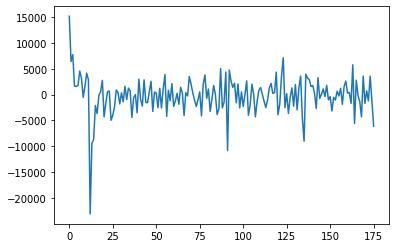

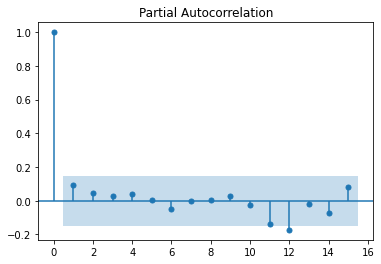

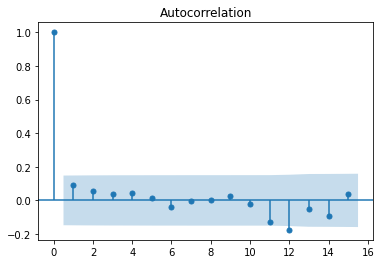

In [47]:
arima = SARIMAX(data['wine'].values, order=(2,1,1), seasonal_order=(1, 1, 1, 12)).fit()

plt.plot(arima.resid)
plot_pacf(arima.resid, lags=15)
plot_acf(arima.resid, lags=15)

plt.show()

/home/hp/.local/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


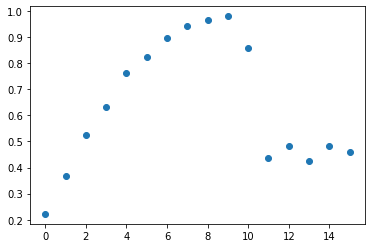

In [48]:
plt.scatter(range(16), acorr_ljungbox(arima.resid, lags=16)[1])

plt.show()

Q-Q plot:

ShapiroResult(statistic=0.8828683495521545, pvalue=1.630462986845771e-10)


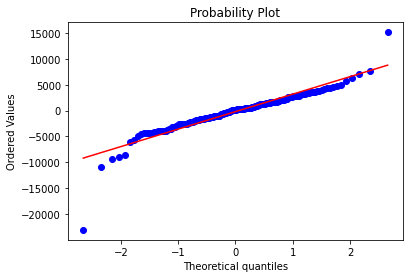

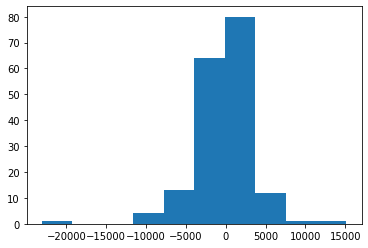

In [49]:
_ = st.probplot(arima.resid, plot=plt)
print (st.shapiro(arima.resid))
plt.show()
plt.hist(arima.resid)

plt.show()

In [63]:
arima = SARIMAX(data['wine'].values[:-12], order=(2,1,1), seasonal_order=(1,1,1,12)).fit()
predicted = arima.predict(0, data.shape[0])

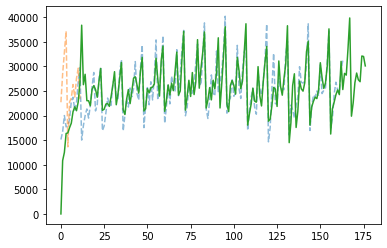

In [64]:
plt.plot(data['wine'].values[:-12], alpha=0.5, ls='--')
plt.plot(data['wine'].values[-12:], alpha=0.5, ls='--')
plt.plot(predicted)

plt.show()

In [65]:
arima = SARIMAX(data['wine'].values[:-12], order=(2,1,1), seasonal_order=(1,1,1,12)).fit()
predicted = arima.predict(data.shape[0]-12, data.shape[0]-1, dynamic=True)

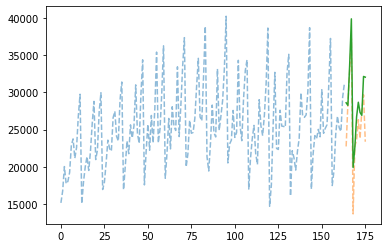

In [66]:
plt.plot(data['wine'].values[:-12], alpha=0.5, ls='--')
plt.plot(range(len(data['wine'].values[:-12]), len(data['wine'])), data['wine'].values[-12:], alpha=0.5, ls='--')
plt.plot(range(len(data['wine'].values[:-12]), len(data['wine'])), predicted)

plt.show()

### ETS

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


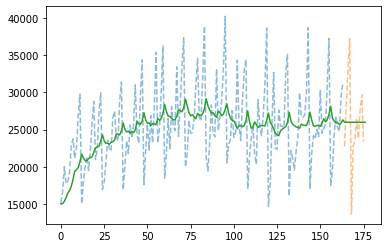

In [54]:
ets = ExponentialSmoothing(data['wine'].values[12:]).fit(optimized=True)

predicted = ets.predict(0, data.shape[0])

plt.plot(data['wine'].values[:-12], alpha=0.5, ls='--')
plt.plot(range(len(data['wine'].values[:-12]), len(data['wine'])), data['wine'].values[-12:], alpha=0.5, ls='--')
plt.plot(predicted)

plt.show()

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


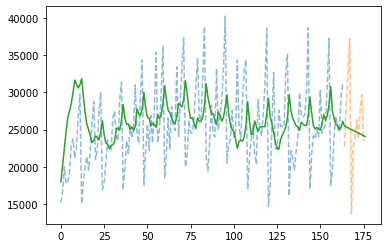

In [56]:
ets = ExponentialSmoothing(data['wine'].values[12:], trend='add').fit()

predicted = ets.predict(0, data.shape[0])

plt.plot(data['wine'].values[:-12], alpha=0.5, ls='--')
plt.plot(range(len(data['wine'].values[:-12]), len(data['wine'])), data['wine'].values[-12:], alpha=0.5, ls='--')
plt.plot(predicted)

plt.show()

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


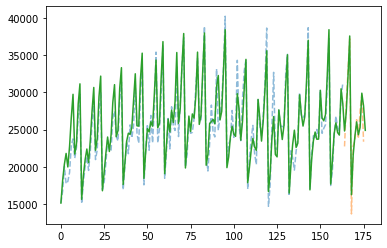

In [57]:
ets = ExponentialSmoothing(data['wine'].values[12:], seasonal='mul', trend='add', seasonal_periods=12).fit()

predicted = ets.predict(0, data.shape[0])

plt.plot(data['wine'].values[:-12], alpha=0.5, ls='--')
plt.plot(range(len(data['wine'].values[:-12]), len(data['wine'])), data['wine'].values[-12:], alpha=0.5, ls='--')
plt.plot(predicted)

plt.show()

ShapiroResult(statistic=0.9593017101287842, pvalue=0.00010100699728354812)


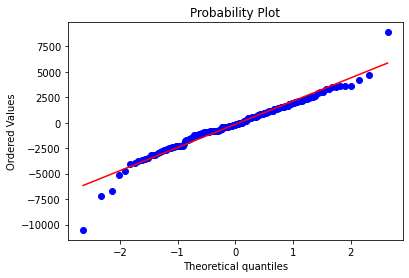

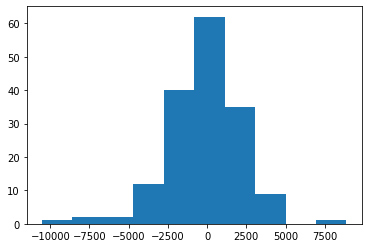

In [58]:
_ = st.probplot(ets.resid, plot=plt)
print (st.shapiro(ets.resid))
plt.show()

plt.hist(ets.resid)
plt.show()

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


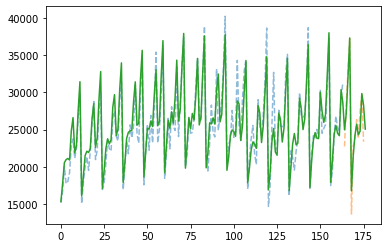

In [59]:
ets = ExponentialSmoothing(data['wine'].values[12:], seasonal='mul', trend='add', seasonal_periods=12).fit(use_boxcox=True)

predicted = ets.predict(0, data.shape[0])

plt.plot(data['wine'].values[:-12], alpha=0.5, ls='--')
plt.plot(range(len(data['wine'].values[:-12]), len(data['wine'])), data['wine'].values[-12:], alpha=0.5, ls='--')
plt.plot(predicted)

plt.show()

ShapiroResult(statistic=0.9606784582138062, pvalue=0.00013732767547480762)


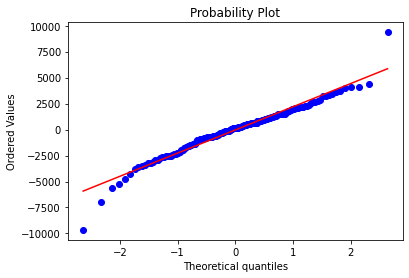

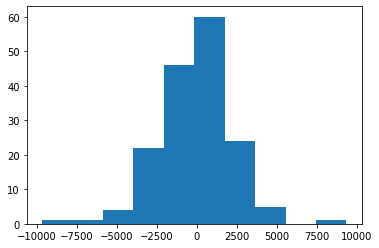

In [60]:
_ = st.probplot(ets.resid, plot=plt)
print (st.shapiro(ets.resid))
plt.show()

plt.hist(ets.resid)
plt.show()

/home/hp/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


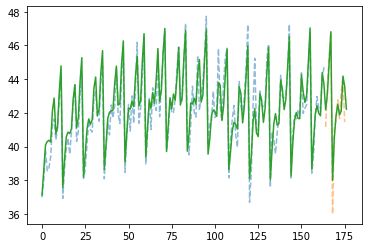

In [61]:
ets = ExponentialSmoothing(data['bc'].values[12:], seasonal='mul', trend='add', seasonal_periods=12).fit()

predicted = ets.predict(0, data.shape[0])

plt.plot(data['bc'].values[:-12], alpha=0.5, ls='--')
plt.plot(range(len(data['bc'].values[:-12]), len(data['bc'])), data['bc'].values[-12:], alpha=0.5, ls='--')
plt.plot(predicted)

plt.show()

ShapiroResult(statistic=0.9596889019012451, pvalue=0.00011006811109837145)


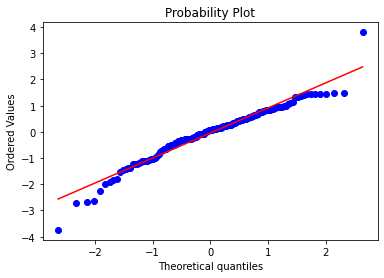

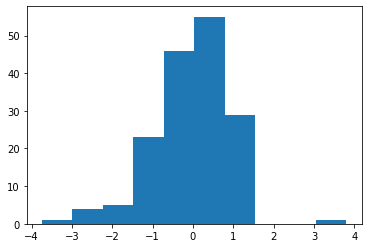

In [62]:
_ = st.probplot(ets.resid, plot=plt)
print (st.shapiro(ets.resid))
plt.show()

plt.hist(ets.resid)
plt.show()